<a href="https://colab.research.google.com/github/jacobireland/Spotify-API-Playlist-Creator/blob/main/playlistCreator.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
!pip install requests
import requests
import numpy as np
import matplotlib.pyplot as plt
import json
from urllib.parse import urlencode

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
#Authenticate

# User credentials you get from registering a new application on the Spotify Developers dashboard
client_id = "<your_client_id>"
client_secret = "<your_client_secret>"
redirect_uri = '<your_redirect_uri>'

# OAuth endpoints given in the Spotify API documentation
# https://developer.spotify.com/documentation/general/guides/authorization/code-flow/
authorization_base_url = "https://accounts.spotify.com/authorize"
token_url = "https://accounts.spotify.com/api/token"
# https://developer.spotify.com/documentation/general/guides/authorization/scopes/
scope = [
    "user-read-email",
    "user-top-read",
    "playlist-modify-public",
    "playlist-modify-private"
]

from requests_oauthlib import OAuth2Session
spotify = OAuth2Session(client_id, scope=scope, redirect_uri=redirect_uri)

# Redirect user to Spotify for authorization
authorization_url, state = spotify.authorization_url(authorization_base_url)
print('Please go here and authorize: ', authorization_url)

# Get the authorization verifier code from the callback url
redirect_response = input('\n\nPaste the full redirect URL here: ')

from requests.auth import HTTPBasicAuth

auth = HTTPBasicAuth(client_id, client_secret)

# Fetch the access token
token = spotify.fetch_token(token_url, auth=auth, authorization_response=redirect_response)

user1_access_token = token['access_token']

print(token)

# Fetch a protected resource, i.e. user profile
r = spotify.get('https://api.spotify.com/v1/me')

info = r.json()
user_id = info['id']


Please go here and authorize:  https://accounts.spotify.com/authorize?response_type=code&client_id=ba8719443e4c4805a0eb198e94939bb6&redirect_uri=https%3A%2F%2Flocalhost%3A8888%2Fcallback&scope=user-read-email+user-top-read+playlist-modify-public+playlist-modify-private&state=Dq5Gom2bLWbVkTmUx8tN26mqPk4pj6


Paste the full redirect URL here: https://localhost:8888/callback?code=AQA4n57JMkg4bhP5EjAJRRdCpkKcB_tDzryqded7renTSO5s4flJZnpku-MdvV89w1-7QXnEjiwMJpWYqECg-pFOhnYnKHTrlZrPeqoR-2DaYQitRz6cnQD91oTr7JSXcnvlK7KrMxlrv81x5zSJyTb_OlQYJFiKnA6kFhFLYG4b_aWdTunaQAiC6KJ2dqfAjY9ljg_WczuL2F8NxVywxTtUkVAbVpbvxS9TzaNIszw5RBrbdaCmtRpxrNOTzq-8lV-Jp3IE9dOwGGHIzRFRvB1z9oA&state=Dq5Gom2bLWbVkTmUx8tN26mqPk4pj6
{'access_token': 'BQDt8uM5cRWAAZ_HLVEXuJ8pm66luIdUa1rLaviXbQmkYdkRF-Sub5aubNoukED1ltkEtFrVVkXiPpOdFpgtYeuWEMJvCYq3oi2SidWbVGEtmfPymoEUlLKODIvO5DktKNS4_Rj4Wq6iUoyDml1xEan2tRaeiKXGxos-DeAVdiwKQ8yYf9uKQp2zQXn1rXCgXX1nOuEBKGlSZfWIiljXl1JeGxl7EbtYdN0AeFy1Klh4V-wwG2_lwqMxIRV_', 'token_type': 'Bearer', 'e

In [114]:
#send GET request for user's top artists
user_type = "artists"

endpoint = "https://api.spotify.com/v1/me/top/"

user_header =  {"Authorization": f"Bearer {user1_access_token}"}

final_url = f"{endpoint}{user_type}?limit=200"

r = requests.get(final_url, headers=user_header)


#create array of genres, based on top artists listened too
topTracks = r.json()
topGenres = []
topGenresAmt = []
y=0;
for t in topTracks['items']:
  equal = 0
  genre = t['genres']
  if y == 0:
    topGenres.append(genre[0].split().pop(-1))
    topGenresAmt.append(0)
    y = y+1

  else:
    for i in topGenres:
      if (len(genre) > 0):
        if i == genre[0].split().pop(-1):
          equal = 1;
    if equal == 0:
      if len(genre) > 0:
        topGenres.append(genre[0].split().pop(-1))
        topGenresAmt.append(0)


#create an array to keep track of commoness of each genre type
x = 0
for t in topGenres:
  for i in topTracks['items']:
    genre = i['genres']
    if len(genre) > 0:
      if t == genre[0].split().pop(-1):
        topGenresAmt[x] = topGenresAmt[x]+1
  x = x+1


print(topTracks)
print(topGenres)
print(topGenresAmt)


{'items': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/5K4W6rqBFWDnAN6FQUkS6x'}, 'followers': {'href': None, 'total': 17698450}, 'genres': ['chicago rap', 'rap'], 'href': 'https://api.spotify.com/v1/artists/5K4W6rqBFWDnAN6FQUkS6x', 'id': '5K4W6rqBFWDnAN6FQUkS6x', 'images': [{'height': 640, 'url': 'https://i.scdn.co/image/ab6761610000e5eb867008a971fae0f4d913f63a', 'width': 640}, {'height': 320, 'url': 'https://i.scdn.co/image/ab67616100005174867008a971fae0f4d913f63a', 'width': 320}, {'height': 160, 'url': 'https://i.scdn.co/image/ab6761610000f178867008a971fae0f4d913f63a', 'width': 160}], 'name': 'Kanye West', 'popularity': 89, 'type': 'artist', 'uri': 'spotify:artist:5K4W6rqBFWDnAN6FQUkS6x'}, {'external_urls': {'spotify': 'https://open.spotify.com/artist/4LLpKhyESsyAXpc4laK94U'}, 'followers': {'href': None, 'total': 7712886}, 'genres': ['hip hop', 'pittsburgh rap', 'rap'], 'href': 'https://api.spotify.com/v1/artists/4LLpKhyESsyAXpc4laK94U', 'id': '4LLpKhyESsyAXpc4laK9

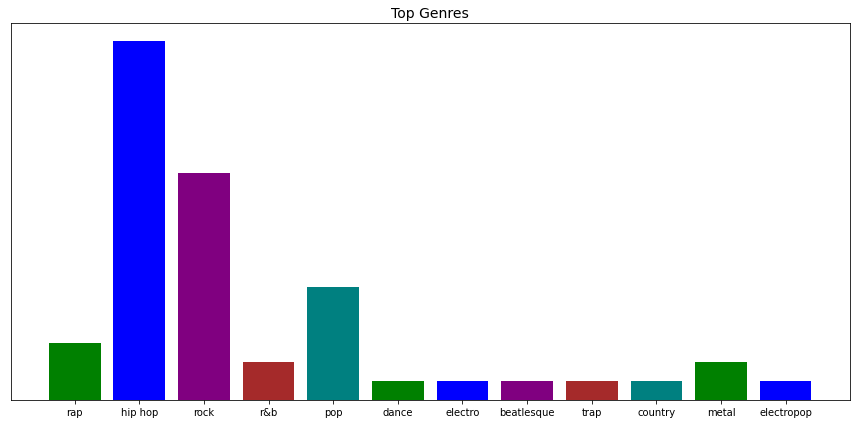

In [115]:
#edit "hop" genre name to be "hip hop" (for chart)
j=0
for i in topGenres:
  if i == 'hop':
    topGenres[j] = 'hip hop'
  j = j+1

#visualize top genres as a bar chart
plt.figure(figsize=(12, 6))
New_Colors = ['green','blue','purple','brown','teal']
plt.bar(topGenres, topGenresAmt, color=New_Colors)
plt.title('Top Genres', fontsize=14)
plt.xlabel('')
plt.ylabel('')
plt.gca().get_yaxis().set_visible(False)
plt.show()


In [39]:
#Genres
#get location of top 3 most listened genres in topGenres array

gen_loc1 = -1
gen_loc2 = -1
gen_loc3 = -1
for i in range(len(topGenresAmt)):
  if gen_loc3 < 0 | topGenresAmt[i] >= topGenresAmt[gen_loc3]:
    if gen_loc2 < 0 | topGenresAmt[i] >= topGenresAmt[gen_loc2]:
      if gen_loc1 < 0 | topGenresAmt[i] >= topGenresAmt[gen_loc1]:
        gen_loc3 = gen_loc2
        gen_loc2 = gen_loc1
        gen_loc1 = i
      else:
        gen_loc3 = gen_loc2
        gen_loc2 = i
    else:
      gen_loc3 = i



#Artists
#get Spotify IDs of top-2 most listened artists for each genre

#genre 1
gen1 = topGenres[gen_loc1]
genre1Artists = []
for t in topTracks['items']:
  artist = t['id']
  if len(t['genres']) > 0:
    genre = t['genres'][0].split().pop(-1)
    if genre == gen1.split().pop(-1):
      genre1Artists.append(artist)
    if len(genre1Artists) == 2:
      break

#genre 2
gen2 = topGenres[gen_loc2]
genre2Artists = []
for t in topTracks['items']:
  artist = t['id']
  if len(t['genres']) > 0:
    genre = t['genres'][0].split().pop(-1)
    if genre == gen2.split().pop(-1):
      genre2Artists.append(artist)
    if len(genre2Artists) == 2:
      break

#genre 3
gen3 = topGenres[gen_loc3]
genre3Artists = []
for t in topTracks['items']:
  artist = t['id']
  if len(t['genres']) > 0:
    genre = t['genres'][0].split().pop(-1)
    if genre == gen3.split().pop(-1):
      genre3Artists.append(artist)
    if len(genre3Artists) == 2:
      break

print(genre1Artists)
print(genre2Artists)
print(genre3Artists)


['4LLpKhyESsyAXpc4laK94U', '2YZyLoL8N0Wb9xBt1NhZWg']
['0L8ExT028jH3ddEcZwqJJ5', '0epOFNiUfyON9EYx7Tpr6V']
['6qqNVTkY8uBg9cP3Jd7DAH', '3kjuyTCjPG1WMFCiyc5IuB']


In [42]:
#Tracks
#get top-2 most listened tracks for each genre
#if a song in your top tracks is made by one of your top two artists (genre specific), it gets added

user_type = "tracks"

endpoint = "https://api.spotify.com/v1/me/top/"

user_header =  {"Authorization": f"Bearer {user1_access_token}"}

final_url = f"{endpoint}{user_type}?limit=200"

r = requests.get(final_url, headers=user_header)

tracks = r.json()


#genre 1 tracks
genre1Tracks = []
for t in tracks['items']:
  artist = t['artists']
  for a in artist:
    name = a['id']
    for i in genre1Artists:
      if name == i:
        song = t['id']
        genre1Tracks.append(song)
  if (len(genre1Tracks) == 2):
    break

#genre 2 tracks
genre2Tracks = []
for t in tracks['items']:
  artist = t['artists']
  for a in artist:
    name = a['id']
    for i in genre2Artists:
      if name == i:
        song = t['id']
        genre2Tracks.append(song)
  if (len(genre2Tracks) == 2):
    break

#genre 3 tracks
genre3Tracks = []
for t in tracks['items']:
  artist = t['artists']
  for a in artist:
    name = a['id']
    for i in genre3Artists:
      if name == i:
        song = t['id']
        genre3Tracks.append(song)
  if (len(genre3Tracks) == 2):
    break

#if no tracks found, that is okay, it means of your top two artists (per genre) none of your top tracks are by them

print(genre1Tracks)
print(genre2Tracks)
print(genre3Tracks)

['2EFqMCOdTTkcFYHoJH21Jr', '388jD8ko9cvFM9cd9TYDrl']
['7hm4HTk9encxT0LYC0J6oI', '10Nmj3JCNoMeBQ87uw5j8k']
['1RGasjWLZ4qMN7wbtkLa3u', '2UWdUez9MB9yzL7Y81Mcip']


In [43]:
#get recommended songs for each of top 3 genres, using users top artists (genre-specific), their top tracks, and selected genre

endpoint = "https://api.spotify.com/v1/recommendations?"
header =  {"Authorization": f"Bearer {user1_access_token}"}

#genre 1 recommendations
genre1Recs = []
data = urlencode({
    "limit": "50",
    "seed_artists": f"{','.join(genre1Artists)}",
    "seed_genres": f"{topGenres[gen_loc1]}",
    "seed_tracks": f"{','.join(genre1Tracks)}"
})
url = f"{endpoint}{data}"
r = requests.get(url, headers=header)
recs = r.json()
for r in recs['tracks']:
  song_id = (r['uri'])
  genre1Recs.append(song_id)

#genre 2 recommendations
genre2Recs = []
data = urlencode({
    "limit": "50",
    "seed_artists": f"{','.join(genre2Artists)}",
    "seed_genres": f"{topGenres[gen_loc2]}",
    "seed_tracks": f"{','.join(genre2Tracks)}"
})
url = f"{endpoint}{data}"
r = requests.get(url, headers=header)
recs = r.json()
for r in recs['tracks']:
  song_id = (r['uri'])
  genre2Recs.append(song_id)

#genre 2 recommendations
genre3Recs = []
data = urlencode({
    "limit": "50",
    "seed_artists": f"{','.join(genre3Artists)}",
    "seed_genres": f"{topGenres[gen_loc3]}",
    "seed_tracks": f"{','.join(genre3Tracks)}"
})
url = f"{endpoint}{data}"
r = requests.get(url, headers=header)
recs = r.json()
for r in recs['tracks']:
  song_id = (r['uri'])
  genre3Recs.append(song_id)

print(genre1Recs)
print(genre2Recs)
print(genre3Recs)

['spotify:track:5hVghJ4KaYES3BFUATCYn0', 'spotify:track:4Aocy7YAyOYf5YHj18Vfj3', 'spotify:track:4YZbVct8l9MnAVIROnLQdx', 'spotify:track:75izAeHlGuOgA865CFDyIv', 'spotify:track:6Yqmv7XJLCrQEauMbPGZSw', 'spotify:track:7wTA0NKIm6T7nP2kaymU2a', 'spotify:track:0mCVNGC4Vvb6gDDQrDpaRh', 'spotify:track:4KDNRh9Oor80z3XIxdWlui', 'spotify:track:5sdkS8DXx8rXNLxbSos8GS', 'spotify:track:2LMkwUfqC6S6s6qDVlEuzV', 'spotify:track:4RVbK6cV0VqWdpCDcx3hiT', 'spotify:track:2Yv2mHzr5AQavVdwQjEokV', 'spotify:track:6tqIes4TjudsjfIpK4P2Jh', 'spotify:track:3J4VKkUpLvomXJbn9ZAypO', 'spotify:track:3e7Y6sfFlIdBMJhX7wpqVO', 'spotify:track:45WkcBtgPS8xulUwEg63X1', 'spotify:track:2jdw2tc29bqJwToyGvKgJm', 'spotify:track:44MHQm2WIvsAXg14WKpCQp', 'spotify:track:54Yappwod1fELR5zb2gDBn', 'spotify:track:4cxMGhkinTocPSVVKWIw0d', 'spotify:track:2cYqizR4lgvp4Qu6IQ3qGN', 'spotify:track:3iVcZ5G6tvkXZkZKlMpIUs', 'spotify:track:0uqsdBw9KvD8jSWmfMmMAp', 'spotify:track:21O0XXPEWPtePt5RMY93Ob', 'spotify:track:4nRKMlLUK5sLa8lmuEA9iv',

In [44]:
#create playlist for each genre, and add songs

url = f"https://api.spotify.com/v1/users/{user_id}/playlists"

header = {
    "Authorization": f"Bearer {user1_access_token}"
}



#genre 1

#create playlist
data = {
    "name": f"Recommended {topGenres[gen_loc1]} Playlist",
    "description": f"Playlist of recommened {topGenres[gen_loc1]} songs just for you!",
    "public": "false"
}
r = requests.post(url, json=data, headers=header)
res = r.json()
gen1Playlist = res['id']

#add songs
data1 = urlencode({
    "uris": ','.join(genre1Recs),
    "position": 0
})
url1 = f"https://api.spotify.com/v1/playlists/{gen1Playlist}/tracks?{data1}"
complete = 0
while complete == 0:  #check if request succeeeded, if not, resend until it does (sometimes the API does not add the songs to the playlist)
  r1 = requests.post(url1, json=data1, headers=header)
  if (r1.status_code == 200) | (r1.status_code == 201):
    complete = 1


#genre 2
data = {
    "name": f"Recommended {topGenres[gen_loc2]} Playlist",
    "description": f"Playlist of recommened {topGenres[gen_loc2]} songs just for you!",
    "public": "false"
}
r = requests.post(url, json=data, headers=header)
res = r.json()
gen2Playlist = res['id']

data2 = urlencode({
    "uris": ','.join(genre2Recs),
    "position": 0
})
url2 = f"https://api.spotify.com/v1/playlists/{gen2Playlist}/tracks?{data2}"
complete = 0
while complete == 0:
  r2 = requests.post(url2, json=data2, headers=header)
  if (r2.status_code == 200) | (r2.status_code == 201):
    complete = 1


#genre 3
data = {
    "name": f"Recommended {topGenres[gen_loc3]} Playlist",
    "description": f"Playlist of recommened {topGenres[gen_loc3]} songs just for you!",
    "public": "false"
}
r = requests.post(url, json=data, headers=header)
res = r.json()
gen3Playlist = res['id']

data3 = urlencode({
    "uris": ','.join(genre3Recs),
    "position": 0
})
url3 = f"https://api.spotify.com/v1/playlists/{gen3Playlist}/tracks?{data3}"
complete = 0
while complete == 0:
  r3 = requests.post(url3, json=data3, headers=header)
  if (r3.status_code == 200) | (r3.status_code == 201):
    complete = 1
